# CSE474/574 - Programming Assignment 2

## Part 2 - Image Classification

Additional library requirement: `Pillow`. See [here](https://anaconda.org/anaconda/pillow) for installation instructions.

For this part, we will use `keras` with a `tensorflow` backend, instead of directly using `tensorflow`, as in Part 1. See [here](https://anaconda.org/conda-forge/keras) for installation instructions.

In [2]:
#pip install keras

In [3]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np
import random as rd
import time
import pickle
import os
from PIL import Image
#os.environ["CUDA_VISIBLE_DEVICES"]="1"
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
/Users/shiva/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/shiva/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/shiva/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/shiva/opt/anaconda3/lib/python3.7/sit

In [4]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
init = tf.global_variables_initializer()

In [5]:
def resize_images(data,size):
    '''
    Resize images in a given data matrix (1 per row) to the specified size in the tuple - size.
    '''
    resized_data = np.empty((data.shape[0],size[0]*size[1]))
    for i in range(data.shape[0]):
        d = (np.array(Image.fromarray(data[i,:].reshape((28,28))).resize(size))).flatten()
        resized_data[i,:] = d
    return resized_data    

In [6]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [7]:
# Preparing the data set
with open('AI_quick_draw.pickle', 'rb') as open_ai_quick:
    data_train = pickle.load(open_ai_quick)
    label_train1 = pickle.load(open_ai_quick)
    data_test = pickle.load(open_ai_quick)
    label_test1 = pickle.load(open_ai_quick)
n_classes = len(np.unique(label_train1))
#data_train = resize_images(data_train, (20, 20))
#data_test = resize_images(data_test, (20, 20))

# convert labels to 0-1 hot encoding
label_train = np.zeros((label_train1.shape[0], n_classes))
a = np.arange(label_train1.shape[0], dtype=np.int64)
b = np.array(label_train1, dtype=np.int64).reshape((label_train1.shape[0],))
label_train[a, b] = 1

label_test = np.zeros((label_test1.shape[0], n_classes))
c = np.arange(label_test1.shape[0], dtype=np.int64)
d = np.array(label_test1, dtype=np.int64).reshape((label_test1.shape[0],))
label_test[c, d] = 1

In [8]:
'''
def resize_images(data,size):
    
    #Resize images in a given data matrix (1 per row) to the specified size in the tuple - size.
    
    resized_data = np.empty((data.shape[0],size[0]*size[1]))
    for i in range(data.shape[0]):
        d = (np.array(Image.fromarray(data[i,:].reshape((28,28))).resize(size))).flatten()
        resized_data[i,:] = d
    return resized_data  
'''

'\ndef resize_images(data,size):\n    \n    #Resize images in a given data matrix (1 per row) to the specified size in the tuple - size.\n    \n    resized_data = np.empty((data.shape[0],size[0]*size[1]))\n    for i in range(data.shape[0]):\n        d = (np.array(Image.fromarray(data[i,:].reshape((28,28))).resize(size))).flatten()\n        resized_data[i,:] = d\n    return resized_data  \n'

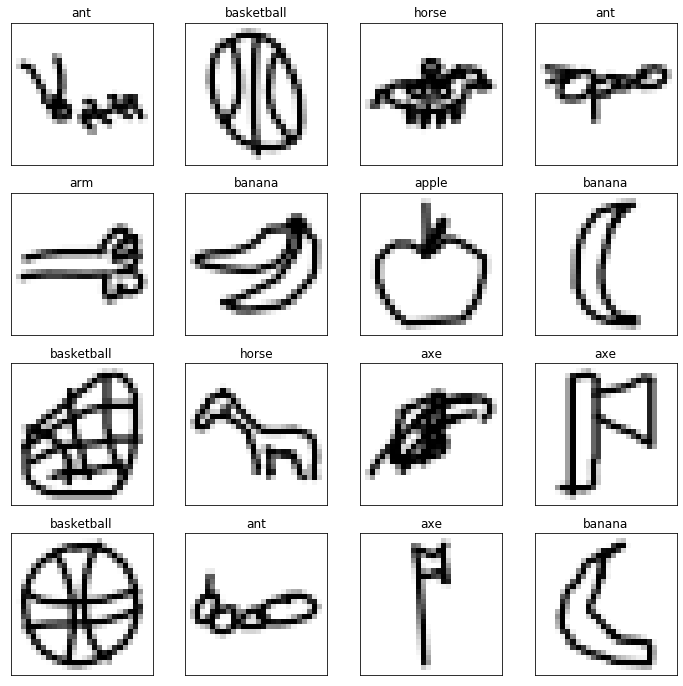

In [9]:
# visualize some images
fig = plt.figure(figsize=[12,12])
for i in range(16):
    ax = plt.subplot(4,4,i+1)    
    ind = np.random.randint(0,data_train.shape[0])
    plt.imshow(data_train[ind,:].reshape((28,28)),cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(label_train1[ind])])

In [10]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

**WARNING**: This cell will take a significantly long time to run

In [11]:
with tf.Session() as sess:
    start_time = time.time()
    sess.run(init)
    model = Sequential()
    model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
    # you can add more Dense layers here
#     model.add(Dense(256, activation = 'relu'))
#     model.add(Dense(256, activation = 'relu'))
#     model.add(Dense(256, activation = 'relu'))
#     model.add(Dense(256, activation = 'relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(data_train, label_train, epochs=500, batch_size=32)
    
    duration = time.time() - start_time
    print('Time elapsed - {} seconds.'.format(duration))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
100000/100000 [==============================] - 8s 79us/step - loss: 11.6921 - accuracy: 0.2735
Epoch 2/500
100000/100000 [==============================] - 7s 68us/step - loss: 11.3018 - accuracy: 0.2983
Epoch 3/500
100000/100000 [==============================] - 7s 66us/step - loss: 11.2382 - accuracy: 0.3023
Epoch 4/500
100000/100000 [==============================] - 7s 67us/step - loss: 11.1983 - accuracy: 0.3048
Epoch 5/500
100000/100000 [==============================] - 7s 67us/step - loss: 11.1460 - accuracy: 0.3081
Epoch 6/500
100000/100000 [==============================] - 7s 66us/step - loss: 11.1485 - accuracy: 0.3080: 1s - loss: 11.1607 - ETA: 0s - loss: 11.1420 - 
Epoch 7/500
100000/100000 [==============================] - 7s 70us/step - loss: 11.0985 - accuracy: 0.3111
Epoch 8/500
100000/100000 [==============================] - 7s 67us

100000/100000 [==============================] - 7s 66us/step - loss: 10.6996 - accuracy: 0.3361
Epoch 67/500
100000/100000 [==============================] - 6s 63us/step - loss: 10.7183 - accuracy: 0.3348
Epoch 68/500
100000/100000 [==============================] - 6s 64us/step - loss: 10.7088 - accuracy: 0.3354: 
Epoch 69/500
100000/100000 [==============================] - 6s 64us/step - loss: 10.6997 - accuracy: 0.3360
Epoch 70/500
100000/100000 [==============================] - 6s 63us/step - loss: 10.7478 - accuracy: 0.3330
Epoch 71/500
100000/100000 [==============================] - 6s 63us/step - loss: 10.7253 - accuracy: 0.3344
Epoch 72/500
100000/100000 [==============================] - 8s 77us/step - loss: 10.6887 - accuracy: 0.3368: 0s - loss: 10.6894 - accuracy: 0.336
Epoch 73/500
100000/100000 [==============================] - 7s 67us/step - loss: 10.7261 - accuracy: 0.3344: 0s - loss: 10.7264 - 
Epoch 74/500
100000/100000 [==============================] - 7s 65us/

100000/100000 [==============================] - 9s 88us/step - loss: 9.7909 - accuracy: 0.3922
Epoch 139/500
100000/100000 [==============================] - 8s 79us/step - loss: 9.8345 - accuracy: 0.3895
Epoch 140/500
100000/100000 [==============================] - 8s 82us/step - loss: 9.8655 - accuracy: 0.3876
Epoch 141/500
100000/100000 [==============================] - 8s 84us/step - loss: 9.8549 - accuracy: 0.3882
Epoch 142/500
100000/100000 [==============================] - 9s 85us/step - loss: 9.8596 - accuracy: 0.3879
Epoch 143/500
100000/100000 [==============================] - 7s 69us/step - loss: 9.8146 - accuracy: 0.3907
Epoch 144/500
100000/100000 [==============================] - 9s 86us/step - loss: 9.7915 - accuracy: 0.3922
Epoch 145/500
100000/100000 [==============================] - 7s 67us/step - loss: 9.7786 - accuracy: 0.3929
Epoch 146/500
100000/100000 [==============================] - 7s 67us/step - loss: 9.7958 - accuracy: 0.3918 0s - loss: 9.7940 - accu

100000/100000 [==============================] - 9s 87us/step - loss: 9.5928 - accuracy: 0.4045
Epoch 212/500
100000/100000 [==============================] - 7s 69us/step - loss: 9.5727 - accuracy: 0.4057
Epoch 213/500
100000/100000 [==============================] - 9s 87us/step - loss: 9.5475 - accuracy: 0.4073
Epoch 214/500
100000/100000 [==============================] - 9s 88us/step - loss: 9.5632 - accuracy: 0.4063
Epoch 215/500
100000/100000 [==============================] - 12s 122us/step - loss: 9.5788 - accuracy: 0.4054
Epoch 216/500
100000/100000 [==============================] - 8s 79us/step - loss: 9.5331 - accuracy: 0.4082
Epoch 217/500
100000/100000 [==============================] - 7s 66us/step - loss: 9.5293 - accuracy: 0.4085
Epoch 218/500
100000/100000 [==============================] - 7s 74us/step - loss: 9.5437 - accuracy: 0.4076
Epoch 219/500
100000/100000 [==============================] - 10s 97us/step - loss: 9.5428 - accuracy: 0.40761s -
Epoch 220/500
100

100000/100000 [==============================] - 6s 64us/step - loss: 9.3825 - accuracy: 0.4176
Epoch 285/500
100000/100000 [==============================] - 7s 72us/step - loss: 9.4230 - accuracy: 0.4151
Epoch 286/500
100000/100000 [==============================] - 8s 81us/step - loss: 9.4765 - accuracy: 0.4117
Epoch 287/500
100000/100000 [==============================] - 12s 124us/step - loss: 9.4394 - accuracy: 0.4140
Epoch 288/500
100000/100000 [==============================] - 7s 73us/step - loss: 9.4549 - accuracy: 0.4130
Epoch 289/500
100000/100000 [==============================] - 7s 65us/step - loss: 9.4715 - accuracy: 0.4121
Epoch 290/500
100000/100000 [==============================] - 7s 70us/step - loss: 9.4421 - accuracy: 0.4138 0s - loss: 9.4
Epoch 291/500
100000/100000 [==============================] - 6s 63us/step - loss: 9.4186 - accuracy: 0.4153
Epoch 292/500
100000/100000 [==============================] - 9s 87us/step - loss: 9.3991 - accuracy: 0.4166
Epoch 2

100000/100000 [==============================] - 10s 104us/step - loss: 9.3364 - accuracy: 0.4205
Epoch 358/500
100000/100000 [==============================] - 11s 107us/step - loss: 9.3340 - accuracy: 0.4207
Epoch 359/500
100000/100000 [==============================] - 10s 97us/step - loss: 9.3501 - accuracy: 0.4196
Epoch 360/500
100000/100000 [==============================] - 8s 82us/step - loss: 9.3802 - accuracy: 0.4178
Epoch 361/500
100000/100000 [==============================] - 7s 75us/step - loss: 9.3415 - accuracy: 0.4202
Epoch 362/500
100000/100000 [==============================] - 7s 66us/step - loss: 9.3192 - accuracy: 0.4216
Epoch 363/500
100000/100000 [==============================] - 7s 73us/step - loss: 9.2973 - accuracy: 0.4230
Epoch 364/500
100000/100000 [==============================] - 7s 75us/step - loss: 9.2753 - accuracy: 0.4243
Epoch 365/500
100000/100000 [==============================] - 7s 71us/step - loss: 9.3141 - accuracy: 0.4218 0s - loss: 9.3124 -

100000/100000 [==============================] - 7s 65us/step - loss: 9.2538 - accuracy: 0.4256
Epoch 429/500
100000/100000 [==============================] - 7s 67us/step - loss: 9.2403 - accuracy: 0.4265
Epoch 430/500
100000/100000 [==============================] - 7s 65us/step - loss: 9.3054 - accuracy: 0.4224 0s - loss: 9.3006 - ac
Epoch 431/500
100000/100000 [==============================] - 7s 67us/step - loss: 9.2681 - accuracy: 0.4248 0s - loss: 9.2
Epoch 432/500
100000/100000 [==============================] - 7s 65us/step - loss: 9.2694 - accuracy: 0.4247
Epoch 433/500
100000/100000 [==============================] - 8s 75us/step - loss: 9.2588 - accuracy: 0.4252 0s - l
Epoch 434/500
100000/100000 [==============================] - 7s 71us/step - loss: 9.2387 - accuracy: 0.4266
Epoch 435/500
100000/100000 [==============================] - 7s 66us/step - loss: 9.2845 - accuracy: 0.4237
Epoch 436/500
100000/100000 [==============================] - 7s 68us/step - loss: 9.291

100000/100000 [==============================] - 7s 74us/step - loss: 9.2867 - accuracy: 0.4236
Time elapsed - 3678.2435371875763 seconds.


In [ ]:
# save the model to use with the drawing app (this will be released later)
model.save('pa2-part2-model.h5')